<a href="https://colab.research.google.com/github/canvas2code/CodeAlpha_Sentiments-Analysis-Of-Youtube-2025/blob/main/Sentiment_Analysis_of_Youtube_App_Reviews2025_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install google-play-scraper
!pip install vaderSentiment
!pip install wordcloud

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')

First 5 rows of the DataFrame:


,userName,Rating,Review,Date
0,Max Dall'agnese,1,I thank YouTube for the constant annoying adve...,2025-07-29 14:02:29
1,Oshomah Ekhino,5,excellent amazing,2025-07-29 14:02:08
2,Sk Kismat,4,good 👍👍👍,2025-07-29 14:01:57
3,prajwal singh,5,Better,2025-07-29 14:01:54
4,Hlengiwe Njoko,5,Best ever 🤘,2025-07-29 14:01:49


In [35]:
from google_play_scraper import reviews, Sort
import pandas as pd
result, _ = reviews(
    'com.google.android.youtube',
    lang='en',
    country='us',
    sort=Sort.NEWEST,
    count=500
)

if result:
    df_reviews_youtube = pd.DataFrame(result)
    print(df_reviews_youtube.columns)
    df_reviews_youtube = df_reviews_youtube[['userName', 'score', 'content', 'at']]
    df_reviews_youtube.rename(columns={'score': 'Rating', 'content': 'Review', 'at': 'Date'}, inplace=True)
    print("\nFirst 5 rows of the DataFrame:")
    display(df_reviews_youtube.head())
#For Sentimental Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def classify_sentiment(text):
    score = analyzer.polarity_scores(text)
    compound = score['compound']
    if compound > 0.05:
        return 'Positive'
    elif compound < -0.05:
        return 'Negative'
    else:
        return 'Neutral'
# Apply to all reviews
if 'df_reviews_youtube' in locals() and not df_reviews_youtube.empty:
    df_reviews_youtube['Sentiment'] = df_reviews_youtube['Review'].apply(classify_sentiment)
    print("\nDataFrame with sentiment:")
    display(df_reviews_youtube.head())

else:
    print("No reviews found for the specified app and criteria, or DataFrame is empty.")
    # df_reviews_youtube = pd.DataFrame() # No need to re-initialize if it's already checked

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')

First 5 rows of the DataFrame:


,userName,Rating,Review,Date
0,Maste Maste,5,mastee,2025-07-29 14:05:05
1,Ranil Ojah,5,🙂🙂,2025-07-29 14:04:57
2,Steve Bergen,4,"How do I disable the "" you want to play this v...",2025-07-29 14:04:30
3,Md Abubakkr,5,nice,2025-07-29 14:04:24
4,Max Dall'agnese,1,I thank YouTube for the constant annoying adve...,2025-07-29 14:02:29



DataFrame with sentiment:


,userName,Rating,Review,Date,Sentiment
0,Maste Maste,5,mastee,2025-07-29 14:05:05,Neutral
1,Ranil Ojah,5,🙂🙂,2025-07-29 14:04:57,Positive
2,Steve Bergen,4,"How do I disable the "" you want to play this v...",2025-07-29 14:04:30,Positive
3,Md Abubakkr,5,nice,2025-07-29 14:04:24,Positive
4,Max Dall'agnese,1,I thank YouTube for the constant annoying adve...,2025-07-29 14:02:29,Positive


In [16]:
print(df_reviews_youtube.head())

                    UserName  Rating         Review                Date  \
0               Saeed Shaikh       5    soo bad app 2025-07-29 13:39:10   
1  Celebrity Makhana Bhandar       5  Very nice App 2025-07-29 13:38:52   
2             Charity Moomba       5      I love it 2025-07-29 13:38:24   
3              JANMI PUNSARA       5              ❤ 2025-07-29 13:38:07   
4               Nicky Curtis       5  love this app 2025-07-29 13:37:19   

  Sentiment  
0  Negative  
1  Positive  
2  Positive  
3  Positive  
4  Positive  


In [19]:
import plotly.express as px
custom_colors = ['#AED9E0', '#FFC3A0', '#FFEE93']
fig = px.pie(
    sentiment_counts,
    values='Count',
    names='Sentiment',
    title='YouTube App User Sentiment Analysis 2025',
    color_discrete_sequence=custom_colors,
    hole=0.3
)
fig.update_traces(
    pull=[0.08, 0.05, 0.08],
    textinfo='percent+label',
    textfont_size=16,
    marker=dict(
        line=dict(color='rgba(0,0,0,0.15)', width=4)
    )
)
fig.update_layout(
    font=dict(size=18, color='black'),
    paper_bgcolor='white',
    plot_bgcolor='white',
    title_font=dict(size=24, color='#222', family='Arial Black'),
    showlegend=False
)

fig.show()

**Insights from the YouTube App User Sentiment Analysis:**
Analyzing 500+ recent user reviews from the Google Play Store, we found that the majority of users expressed positive sentiment, highlighting satisfaction with performance and content. However, a notable portion of users reported neutral to negative experiences, suggesting room for improvement in UX consistency and bug fixes.

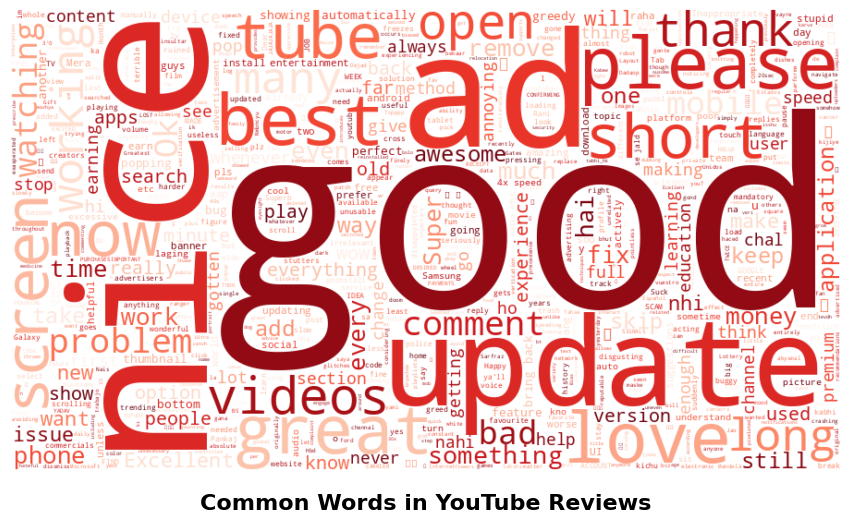

In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.update(["youtube", "video", "app", "watch", "use", "like"])

text = " ".join(df_reviews_youtube['Review'])

wordcloud = WordCloud(width=900, height=500,
                      background_color='white',
                      colormap='Reds', # Changed colormap to 'Reds'
                      stopwords=stopwords,
                      max_words=1500).generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in YouTube Reviews", fontsize=16, fontweight='bold', y=-0.1) # Made title bold and moved to bottom
plt.show()